# gemma-2-27b-it : Analyse finetuning Matrics

[Finetuning Code](https://github.com/Git-PratikVyas/Finetuning-LORA/blob/main/gemma_2_27b_it_LORA_FineTuning.ipynb)

[Matrices at Wights&Bias](https://wandb.ai/pratik_ai/gemma-2-27b-it_ft_summarizer_v2/runs/o68tqunz?nw=nwuserpratik_ai)


# Training,Validation loss


| Step | Training Loss | Validation Loss |
|------|---------------|-----------------|
| 2    | 4.511100      | 2.209300        |
| 4    | 4.492000      | 2.197224        |
| 6    | 4.361000      | 2.147637        |
| 8    | 4.158100      | 2.093275        |
| 10   | 3.986500      | 2.054627        |
| 12   | 3.851800      | 2.033705        |
| 14   | 3.765700      | 2.019828        |
| 16   | 3.695500      | 2.013590        |
| 18   | 3.646500      | 2.007683        |
| 20   | 3.614000      | 2.007731        |

This chart is helpful to identify

**1. Convergence** if  Both training and validation loss decrease and eventually plateau.

**2. Overfitting** if Training loss continues to decrease while validation loss starts to increase.

**3. Underfitting** if Both training and validation loss remain high and do not decrease significantly.


**Interpretation of the Chart**


1. **Initial Phase**:
   - **Observation**: Both training and validation loss start high.
   - **Explanation**: This is expected as the model is just starting to learn and has not yet optimized its parameters.

2. **Middle Phase**:
   - **Observation**: Training loss decreases rapidly, and validation loss also decreases but at a slower rate.
   - **Explanation**: The model is learning from the training data and improving its performance. The validation loss decreasing indicates that the model is also generalizing well to unseen data.

3. **Later Phase**:
   - **Observation**: Training loss continues to decrease and may plateau. Validation loss may start to increase or plateau.
   - **Explanation**: The model is continuing to improve on the training data, but if the validation loss starts to increase, it may indicate overfitting, where the model is learning the training data too well and not generalizing to new data.

 Implementing techniques such as early stopping, regularization, data augmentation, and cross-validation can help improve the model's performance.

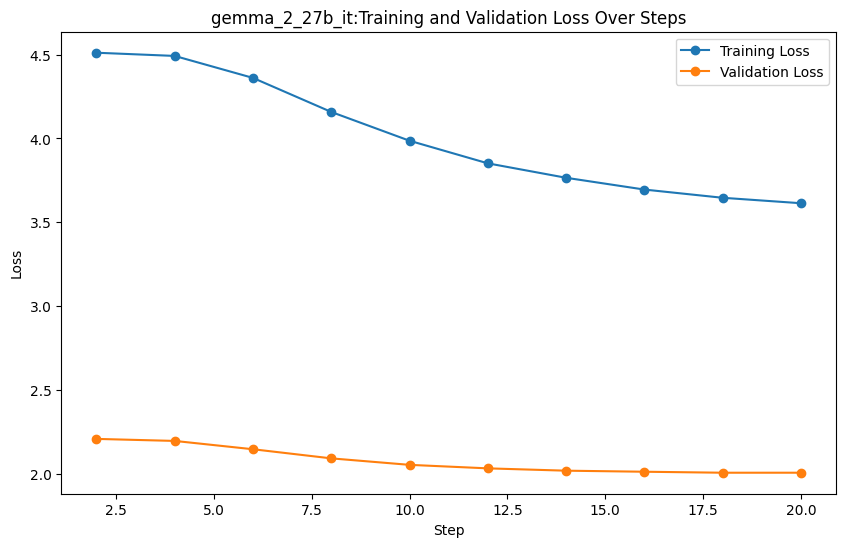

# ROUGE Score

ROUGE Scores

| Metric    | Precision | Recall   | F1 Score |
|-----------|-----------|----------|----------|
| rouge1    | 0.431279  | 0.459164 | 0.429229 |
| rouge2    | 0.190234  | 0.188907 | 0.183210 |
| rougeL    | 0.340706  | 0.360983 | 0.338820 |
| rougeLsum | 0.340706  | 0.360983 | 0.338820 |


1. **ROUGE-1**:
   - **Definition**: Measures the overlap of unigrams (individual words) between the generated summary and the reference summary.
   - **Interpretation**:
     - **Precision (0.431279)**: About **43.13%** of the words in the generated summary are also present in the reference summary.
     - **Recall (0.459164)**: About **45.92%** of the words in the reference summary are captured in the generated summary.
     - **F1 Score (0.429229)**: The harmonic mean of precision and recall, indicating a moderate balance between them.
     - **Implication**: The model captures a reasonable amount of content from the reference but has room for improvement.

2. **ROUGE-2**:
   - **Definition**: Measures the overlap of bigrams (two consecutive words) between the generated summary and the reference summary.
   - **Interpretation**:
     - **Precision (0.190234)**: About **19.02%** of the bigrams in the generated summary match those in the reference summary.
     - **Recall (0.188907)**: About **18.89%** of the bigrams in the reference summary are captured in the generated summary.
     - **F1 Score (0.183210)**: Indicates low performance in capturing bigram overlaps.
     - **Implication**: The model struggles to maintain context and coherence in phrases, suggesting that while some individual words are captured, the model has difficulty forming meaningful sequences.

3. **ROUGE-L**:
   - **Definition**: Measures the longest common subsequence (LCS) between the generated summary and the reference summary, considering word order.
   - **Interpretation**:
     - **Precision (0.340706)**: Approximately **34.07%** of words in the generated summary are part of the longest common subsequence with the reference.
     - **Recall (0.360983)**: About **36.10%** of words from the reference are included in this subsequence.
     - **F1 Score (0.338820)**: Indicates moderate performance but highlights that there is still significant room for improvement.
     - **Implication**: The model captures some sequential relationships but may miss important contextual information.

4. **ROUGE-Lsum**:
   - **Definition**: Similar to ROUGE-L but typically averages LCS scores across multiple sentences or segments.
   - **Interpretation**:
     - **Precision (0.340706)**: Approximately **34.07%** of words in the generated summary are part of the longest common subsequence with the reference.
     - **Recall (0.360983)**: About **36.10%** of words from the reference are included in this subsequence.
     - **F1 Score (0.338820)**: Indicates moderate performance but highlights that there is still significant room for improvement.
     - **Implication**: The values here mirror those of ROUGE-L, indicating consistent performance across both metrics.

**Overall Analysis**

- The scores indicate that while the model performs reasonably well on ROUGE-1, reflecting a decent level of word overlap, it struggles significantly with ROUGE-2, which indicates issues with maintaining phrase coherence and context.
- The low scores for ROUGE-2 suggest that although individual words may be present, they are not forming meaningful sequences or bigrams as effectively as they could be.
- The ROUGE-L and ROUGE-Lsum scores reveal that while there is some ability to capture longer sequences, there is still substantial room for improvement.

**Recommendations for Improvement**

1. **Data Augmentation**:
   - Increase the diversity and size of the training dataset by augmenting the data with paraphrased sentences, synonyms, and varied sentence structures.
   - Helps the model learn to generate summaries that are more varied and closer to human-written summaries.

2. **Fine-Tuning with More Data**:
   - Fine-tune the model with a larger and more diverse dataset.
   - Exposes the model to a wider range of examples, improving its ability to generalize and generate better summaries.

4. **Hyperparameter Tuning**:
   - Experiment with different hyperparameters such as learning rate, batch size, and number of training epochs.
   - Optimizes the training process and improves model performance.

5. **Regularization Techniques**:
   - Apply regularization techniques such as dropout and weight decay.
   - Prevents overfitting and helps the model generalize better to unseen data.

6. **Evaluation and Feedback Loop**:
   - Continuously evaluate the model's performance on a validation set and incorporate feedback to iteratively improve the model.
   - Ensures that the model is improving over time and not overfitting to the training data.

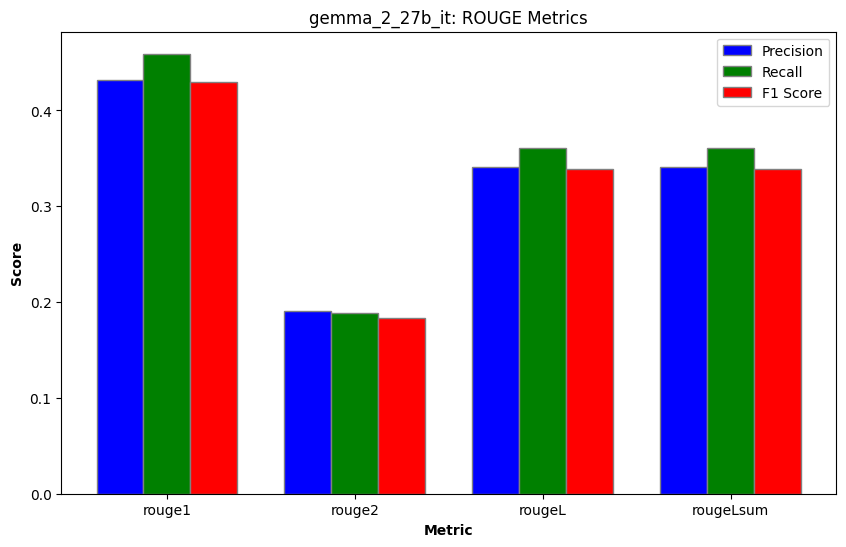

# Gradient Normalisation chart


This chart is helpful to identify

- **Exploding Gradients** If the gradient norms increase exponentially.
   - **Suggestions**:
     - **Gradient Clipping**: Implement gradient clipping to cap the gradients at a maximum value, preventing them from growing too large.
     - **Reduce Learning Rate**: Lower the learning rate to make smaller updates to the model parameters.
     - **Use Normalization Techniques**: Apply normalization techniques such as batch normalization or layer normalization to stabilize training.

- **Vanishing Gradients** If the gradient norms decrease to near zero.
   - **Suggestions**:
     - **Increase Learning Rate**: Raise the learning rate to make larger updates to the model parameters.
     - **Use Activation Functions**: Use activation functions that help mitigate vanishing gradients, such as ReLU or its variants.
     - **Residual Connections**: Implement residual connections to help gradients flow through the network more effectively.

- **Stable Gradients** If the gradient norms remain relatively stable and within a reasonable range.
   - **Suggestions**:
     - **Continue Training**: If the gradients are stable and the model is improving, continue training as planned.
     - **Fine-Tuning**: Fine-tune the model with a lower learning rate to further improve performance.


**Interpretation of the Chart**

- **X-Axis (Epochs or Training Steps)**:
   - **Description**: Represents the progression of training over time, either in terms of epochs or training steps.
   - **Purpose**: Helps to understand how the gradient norms change as the training progresses.

- **Y-Axis (Gradient Norm)**:
   - **Description**: Represents the magnitude of the gradients.
   - **Purpose**: Indicates the size of the updates being made to the model parameters.



1. **Initial Phase**:
   - **Observation**: Gradient norms start at a certain level and may fluctuate significantly.
   - **Explanation**: This phase likely corresponds to the initial stages of training where the model is making large updates to the parameters to quickly reduce the loss. High gradient norms indicate large parameter updates.

2. **Middle Phase**:
   - **Observation**: Gradient norms may stabilize and decrease gradually.
   - **Explanation**: During this phase, the model is learning effectively, and the updates to the parameters become more refined as the model approaches a better solution. Stable gradient norms indicate that the training process is becoming more stable.

3. **Later Phase**:
   - **Observation**: Gradient norms are low and stable.
   - **Explanation**: In the later stages of training, the model is fine-tuning its parameters with small updates, indicating that it is converging towards a minimum of the loss function. Low gradient norms suggest that the model is making small adjustments to improve performance.



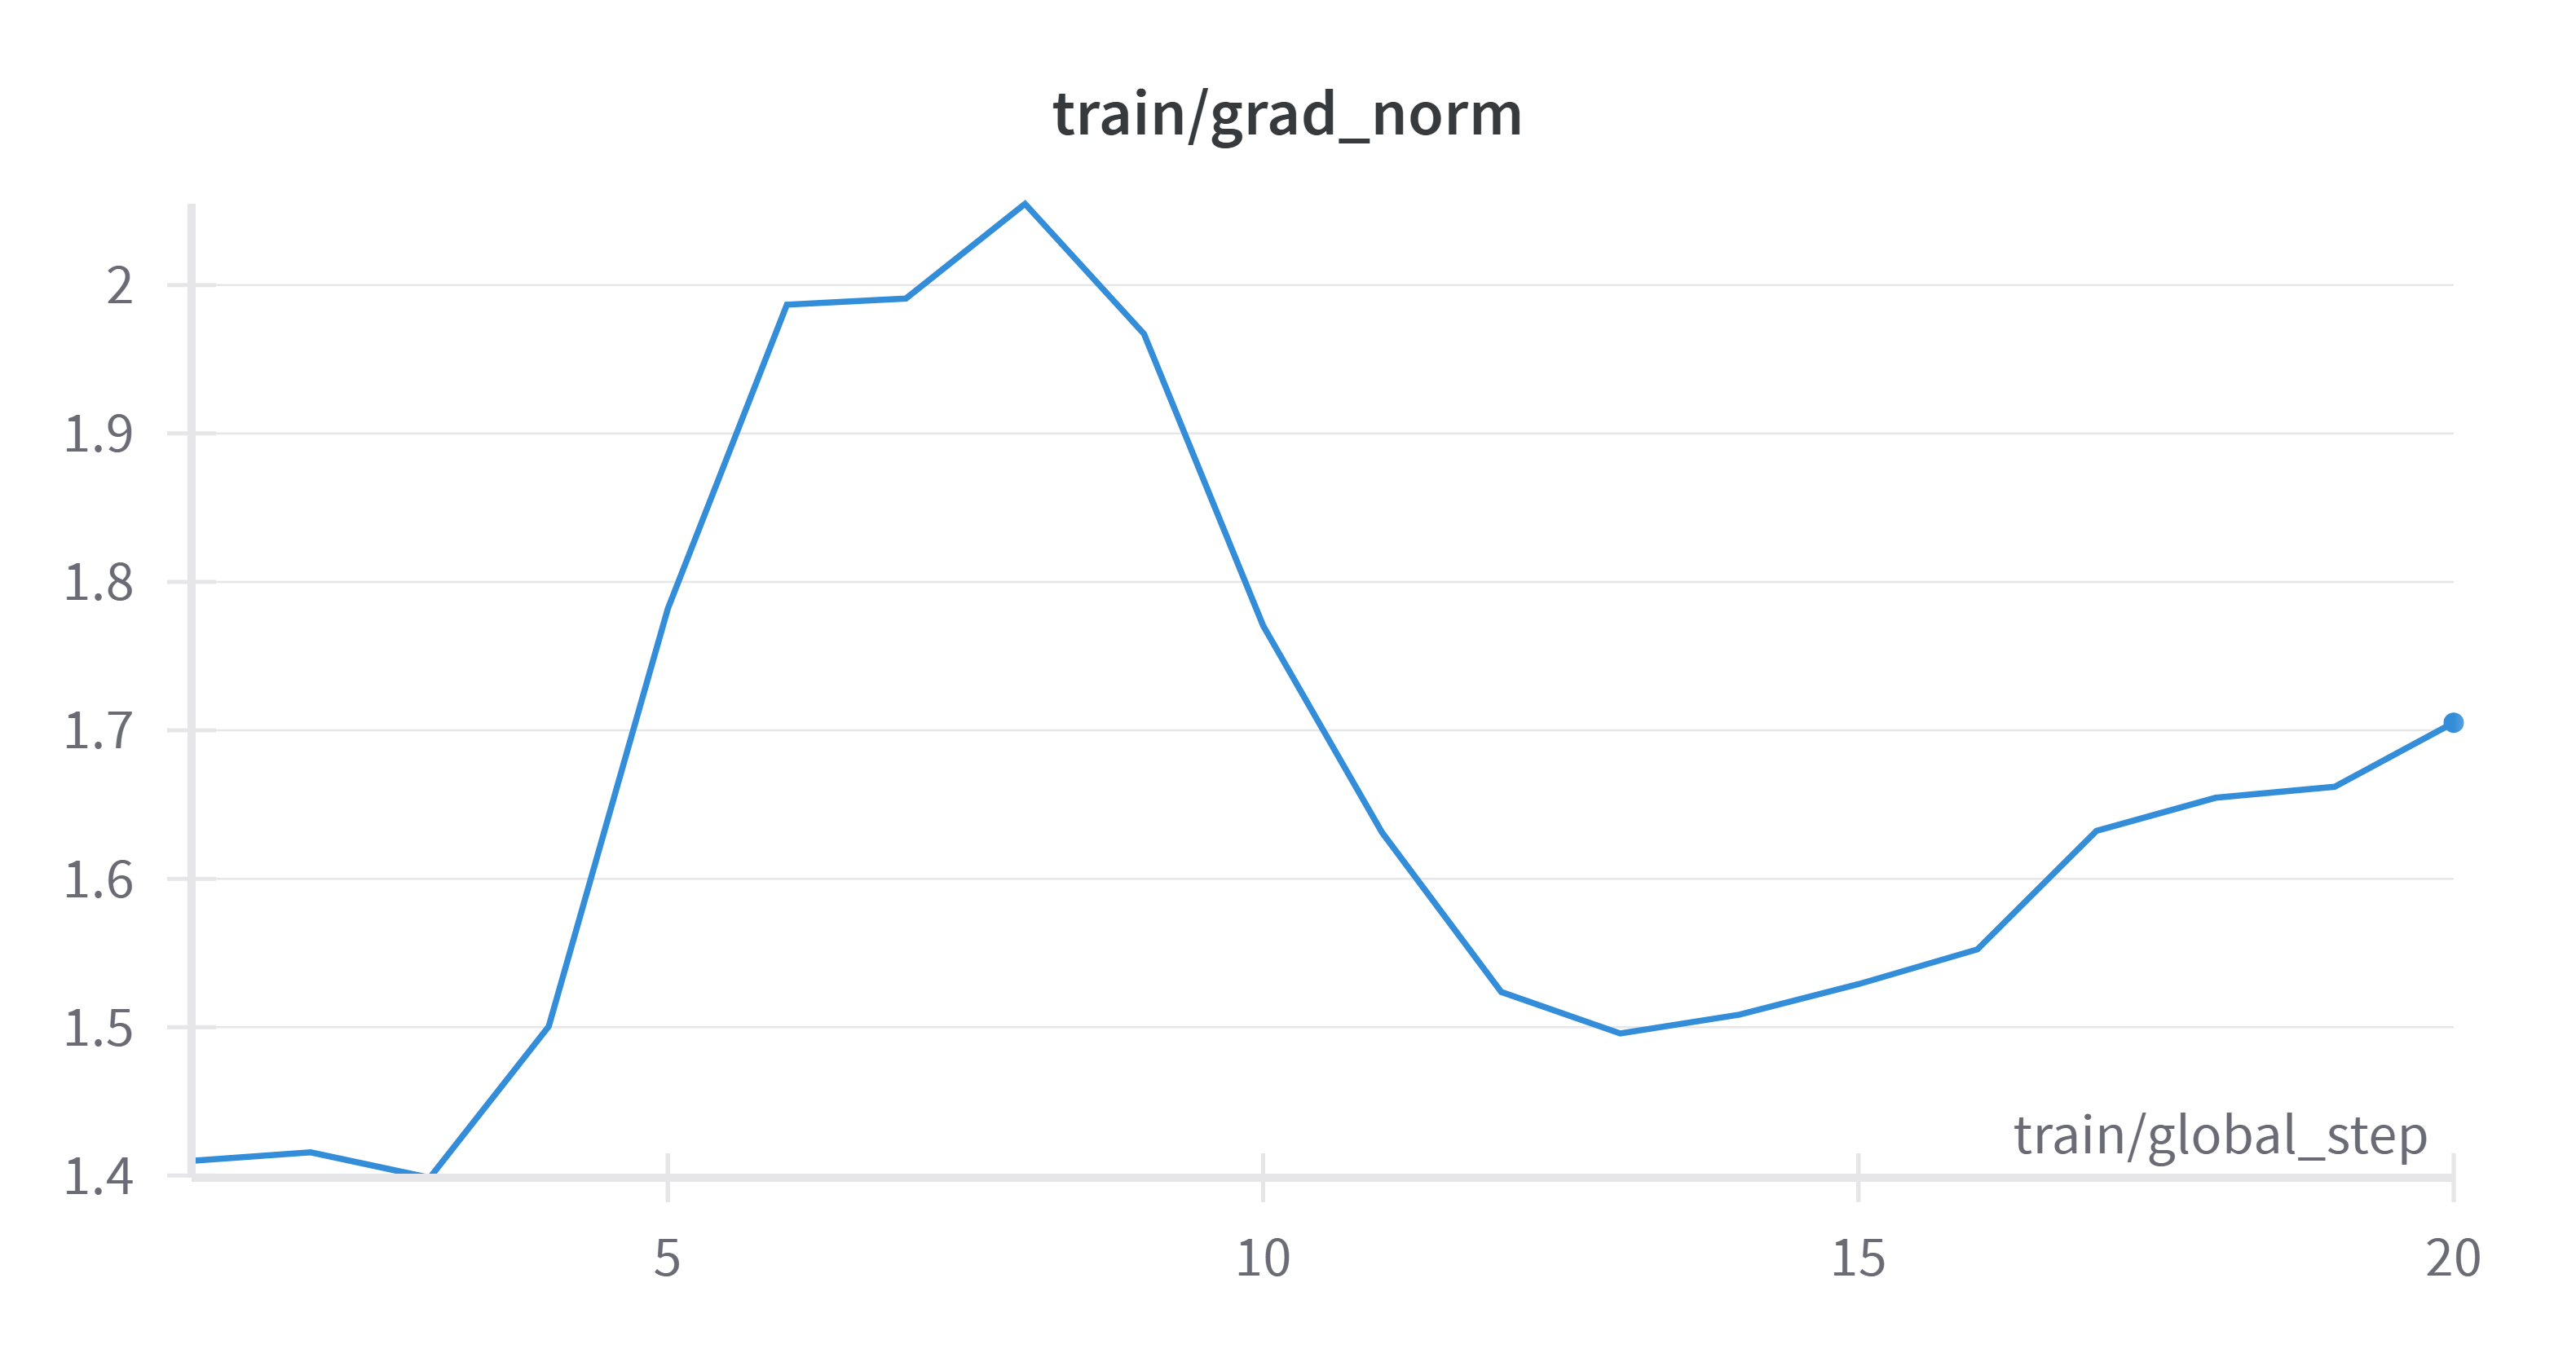

# GPU Utilization Chart

This chart is helpful to identify

- **Consistent High Utilization**:
   - **Observation**: GPU utilization remains consistently high during the training phase.
   - **Explanation**: Indicates that the model and data pipeline are well-optimized, making efficient use of the GPU resources.
   - **Suggestions**:
     - **Maintain Current Setup**: If the GPU utilization is consistently high and the model is improving, continue with the current setup.

- **Fluctuating Utilization**:
   - **Observation**: GPU utilization fluctuates significantly.
   - **Explanation**: May indicate inefficiencies in the training process, such as data loading bottlenecks, suboptimal batch sizes, or CPU-bound tasks that are causing the GPU to wait.
   - **Suggestions**:
     - **Optimize Data Pipeline**: Ensure that data loading and preprocessing are efficient and do not become bottlenecks. Use techniques like data prefetching and parallel data loading.
     - **Adjust Batch Size**: Experiment with different batch sizes to find the optimal size that maximizes GPU utilization without causing memory issues.
     - **Profile and Optimize Code**: Use profiling tools to identify and optimize any CPU-bound tasks that may be causing delays.

- **Low Utilization Periods**:
   - **Observation**: Periods of low GPU utilization.
   - **Explanation**: These periods could correspond to non-training activities such as data preprocessing, model evaluation, or synchronization between devices.
   - **Suggestions**:
     - **Overlap Computation and Communication**: If using multiple GPUs, ensure that computation and communication are overlapped to minimize idle times.
     - **Optimize Evaluation Steps**: If evaluation steps are causing significant drops in utilization, consider optimizing the evaluation process or reducing the frequency of evaluations.

**Interpretation of the Chart**

- **X-Axis (Time or Training Steps)**:
   - **Description**: Represents the progression of time or the number of training steps during the fine-tuning process.
   - **Purpose**: Helps to understand how GPU utilization changes over the duration of the fine-tuning.

- **Y-Axis (GPU Utilization)**:
   - **Description**: Represents the percentage of GPU resources being utilized.
   - **Purpose**: Indicates how effectively the GPU is being used during the fine-tuning process.



1. **Initial Phase**:
   - **Observation**: GPU utilization starts low and gradually increases.
   - **Explanation**: This phase likely corresponds to the initial setup, data loading, and the start of the first few training iterations. During this time, the GPU may not be fully utilized as the model and data are being prepared.

2. **Training Phase**:
   - **Observation**: GPU utilization reaches a high and stable level.
   - **Explanation**: During this phase, the GPU is heavily utilized for forward and backward passes, gradient calculations, and parameter updates. This indicates efficient use of the GPU resources as the model is actively being trained.

3. **Evaluation Phase**:
   - **Observation**: Periodic drops in GPU utilization.
   - **Explanation**: These drops may correspond to evaluation steps where the model's performance is being assessed on the validation dataset. Evaluation typically requires less GPU power compared to training, leading to lower utilization during these periods.

4. **Bottlenecks**:
   - **Observation**: Any significant drops or fluctuations in GPU utilization.
   - **Explanation**: These could indicate bottlenecks such as data loading delays, CPU-GPU synchronization issues, or suboptimal batch sizes. Identifying and addressing these bottlenecks can help improve overall training efficiency.




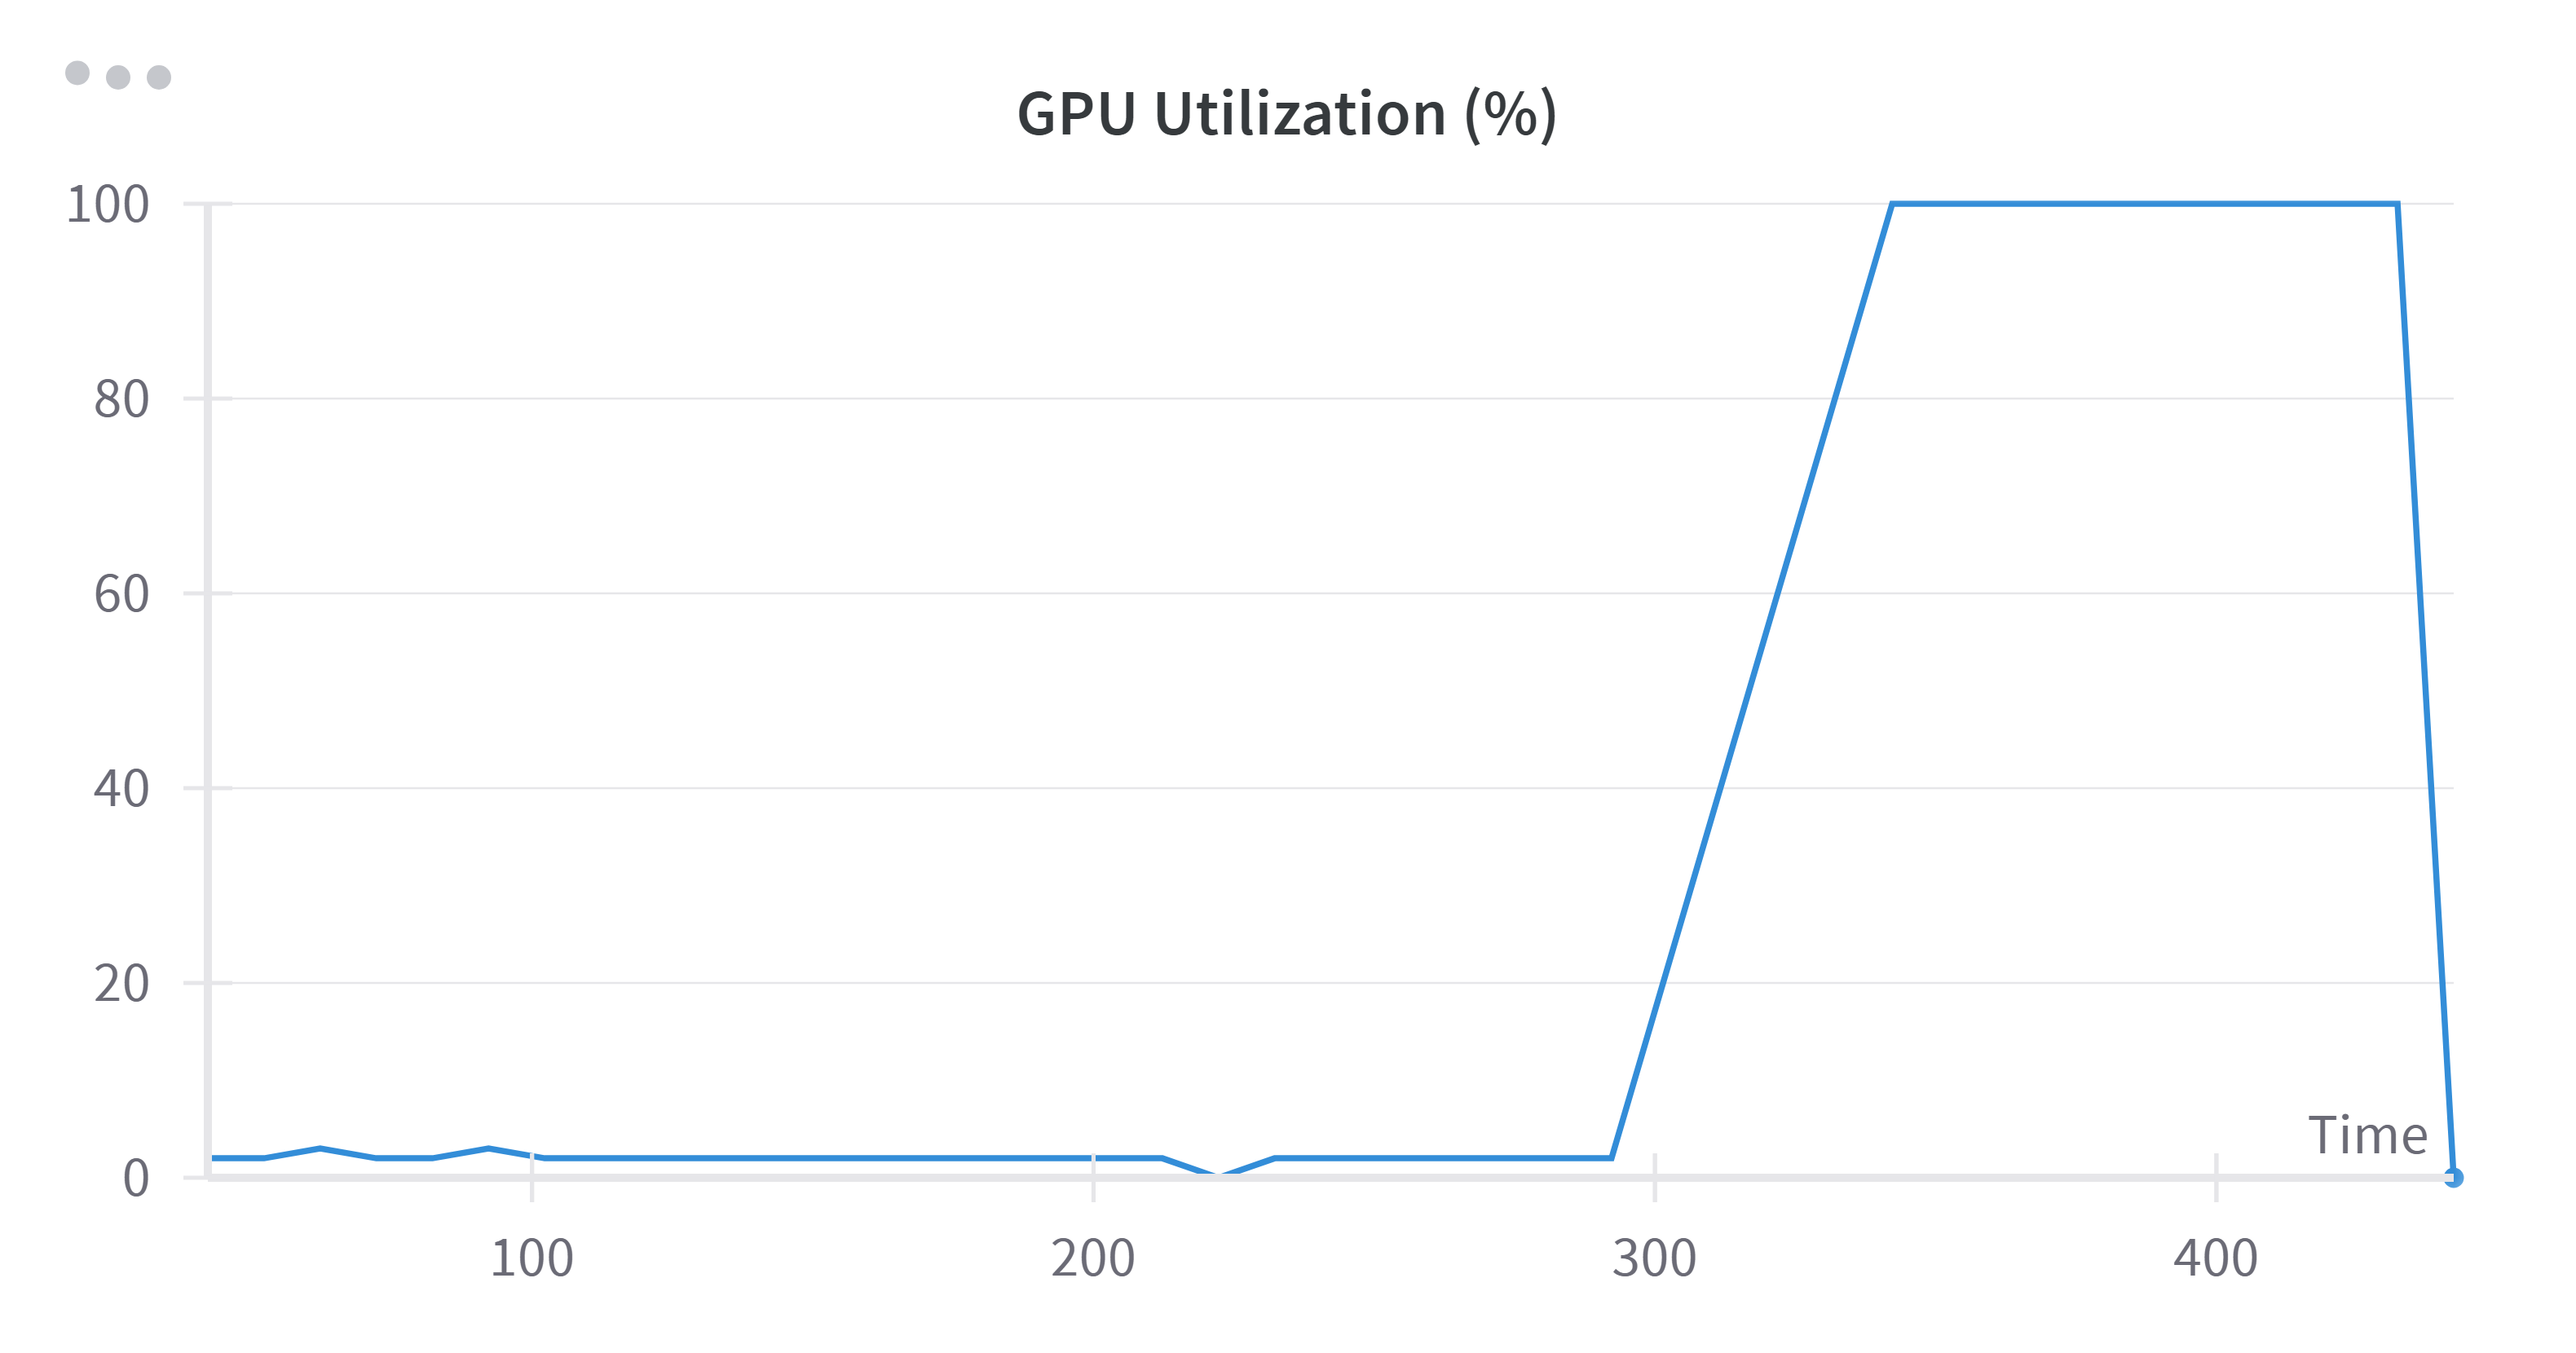